###Overview
<p>Machine learning has become increasingly popular over the past years. The number of NIPS conference papers has risen exponentially, and people are continuously looking for ways on how they can incorporate machine learning into their products and services.</p>
<p>This analysis focuses on analyzing machine learning trends in research.</p>

In [ ]:
import pandas as pd
papers = pd.read_csv("datasets/papers.csv")

papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


###Preparing the data for analysis
<p>For the analysis of the papers, we are only interested in the text data associated with the paper as well as the year the paper was published in.</p>


In [ ]:
papers.drop(['id','event_type','pdf_name'], axis = 1, inplace = True)

papers.head(1)

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...


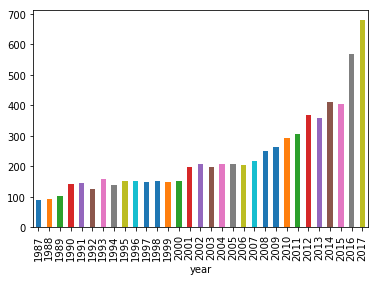

In [ ]:
#Plotting how machine learning has evolved over time
groups = papers.groupby('year')

counts = groups.size()

import matplotlib.pyplot
%matplotlib inline
counts.plot(kind = 'bar')

###Preprocessing the text data


In [ ]:
import re

print(papers['title'].head())

papers['title_processed'] = papers['title'].map(lambda x: re.sub('[,\.!?]', '', x))

papers['title_processed'] = papers['title_processed'].map(lambda x: x.lower())

papers['title_processed'].head()

0    Self-Organization of Associative Database and ...
1    A Mean Field Theory of Layer IV of Visual Cort...
2    Storing Covariance by the Associative Long-Ter...
3    Bayesian Query Construction for Neural Network...
4    Neural Network Ensembles, Cross Validation, an...
Name: title, dtype: object


0    self-organization of associative database and ...
1    a mean field theory of layer iv of visual cort...
2    storing covariance by the associative long-ter...
3    bayesian query construction for neural network...
4    neural network ensembles cross validation and ...
Name: title_processed, dtype: object

###Making a Word-Cloud to visualize the preprocessed text data


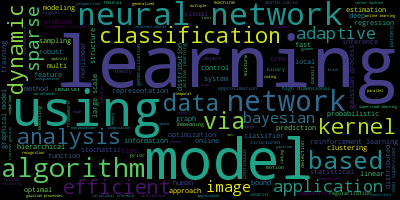

In [ ]:
import wordcloud

long_string = ' '.join(papers['title_processed'])

wordcloud = wordcloud.WordCloud()

wordcloud.generate(long_string)

wordcloud.to_image()

###Preparing the text for LDA analysis

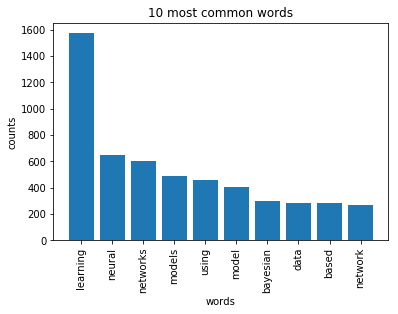

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

count_vectorizer = CountVectorizer(stop_words='english')

count_data = count_vectorizer.fit_transform(papers['title_processed'])

plot_10_most_common_words(count_data, count_vectorizer)

###Analysing trends with LDA


In [ ]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

from sklearn.decomposition import LatentDirichletAllocation as LDA
 
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
number_topics = 10
number_words = 10

lda = LDA(n_components=number_topics)
lda.fit(count_data)

print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
networks learning neural stochastic optimal algorithms optimization fast linear recurrent

Topic #1:
learning multi deep efficient models neural networks recognition robust feature

Topic #2:
model neural using learning convex sparse networks active matching visual

Topic #3:
models bayesian learning classification clustering information estimation large markov variational

Topic #4:
algorithm detection visual rank brain analog natural convolutional low vlsi

Topic #5:
learning data time analysis sparse prediction using supervised multiple neural

Topic #6:
learning generative spike self map discriminative images factorization inverse network

Topic #7:
gaussian regression image processes process random search spectral temporal parallel

Topic #8:
gradient learning descent motion mixtures policy problem variance line action

Topic #9:
non online probabilistic structured bounds scale dimensional representations distributed statistical
